In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

import plotly.express as px 
import plotly.graph_objects as go

In [49]:
path_to_read = 'avocado_mean.csv'

In [50]:
avocado_mean = pd.read_csv(path_to_read, index_col=0, parse_dates=['Date'], squeeze=True)

In [51]:
avocado_mean.head()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
Name: AveragePrice, dtype: float64

Step 2 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26537/117974/'>link</a>
<br>Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [52]:
np.round(avocado_mean.rolling(3).mean().max(), 2)

1.85

Step 3 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26537/117975/'>link</a>
<br>Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.

Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

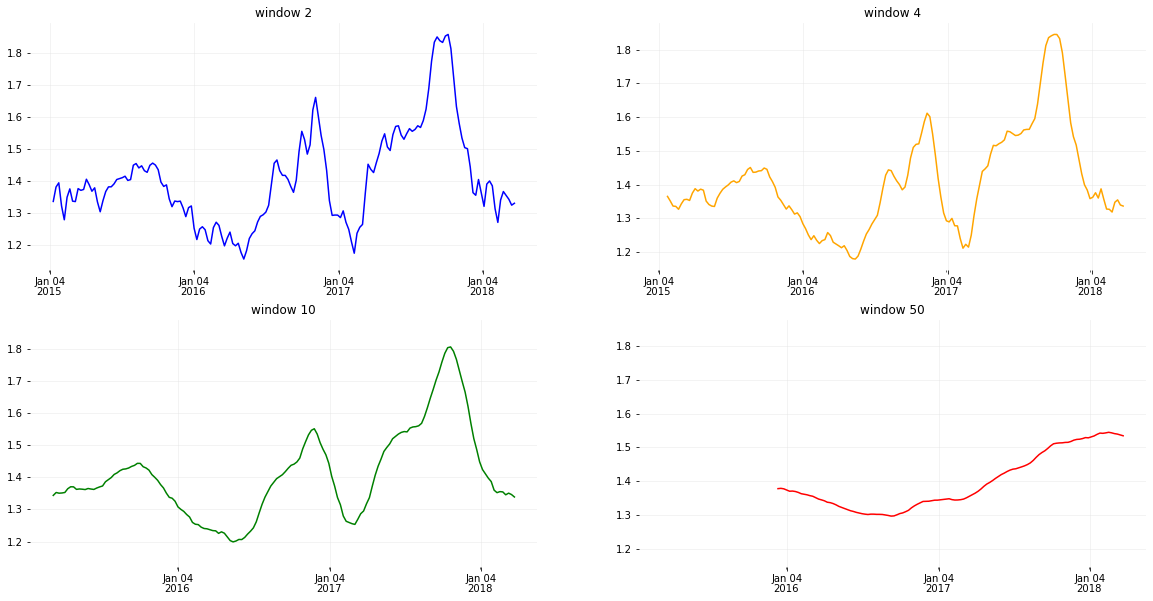

In [66]:
windows = [2, 4, 10, 50]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10), sharey='col', sharex="row")
colors = ['blue', 'orange', 'green', 'red']

for window, ax, color in zip(windows, axes.flatten(), colors):
    ax.plot(avocado_mean.rolling(window).mean(), color=color)
    ax.set_title(f'window {window}')

for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)
    # устанавливаем major locator – 4 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(day=1, month=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)

Step 5 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26537/117977/'>link</a>
<br>Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [81]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

<AxesSubplot:xlabel='Date'>

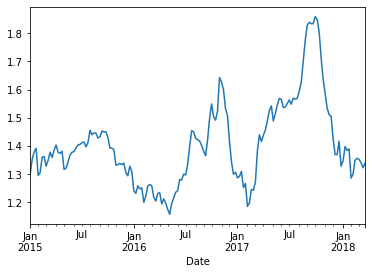

In [82]:
avocado_ewm.plot()

Step 6 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26537/117978/'>link</a>
<br>И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).

Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [115]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0, parse_dates=['Date'])

In [116]:
avocado_full = avocado_full.rename(columns=lambda x: x.replace(' ','_'))
avocado_full.head()

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [137]:
organic_chicago = avocado_full.query('type == "organic" and region == "Chicago"')

roll_mean = organic_chicago.AveragePrice.rolling(4).mean()
ewm_mean = organic_chicago.AveragePrice.ewm(span=4).mean()

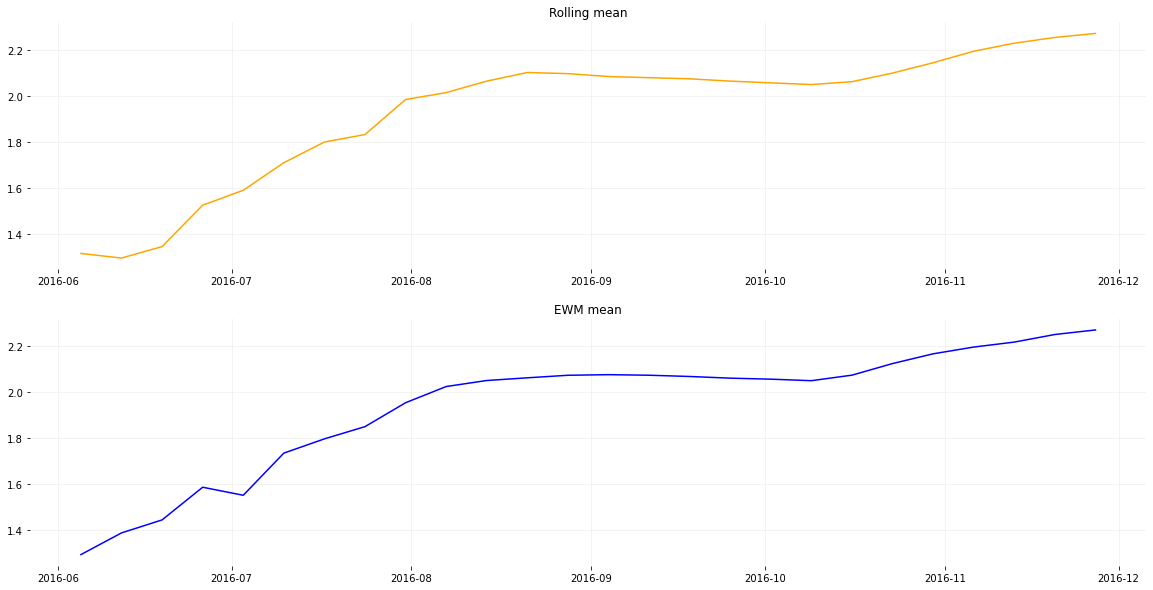

In [145]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(20, 10), sharey=False, sharex=False)

axes[0].plot(roll_mean['2016-06-01':'2016-12-01'], color='orange')
axes[0].set_title('Rolling mean')

axes[1].plot(ewm_mean['2016-06-01':'2016-12-01'], color='blue')
axes[1].set_title('EWM mean')


for ax in axes:
    # удаляем рамку
    ax.set_frame_on(False)
    # устанавливаем major locator – 4 января для каждого года
#     ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
#     ax.xaxis.set_minor_locator(mdates.YearLocator(day=3, month=1))
    # показываем год
#     ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)

In [ ]:
#Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего

In [144]:
roll_mean['2016-08-21']

2.1025

In [139]:
ewm_mean['2016-08-21']

2.0624280388589287

In [140]:
 #19 февраля 2017 среднее, полученное с помощью ewm(), равнялось

In [141]:
ewm_mean['2017-02-19']

1.5618488617826691

In [142]:
roll_mean['2017-02-19']

1.5325000000000002

Step 7 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26537/117979/'>link</a>
<br>💀 Сложное задание! 💀

Далее будем работать с данными по опозданиям в заключении сделок.

В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Пример сабсэта данных:

client_id	company_id	delay	revenue
<br>0	2389	4240	-1 days -14:57:48.000000000	705436
<br>1	7614	9544	-4 days -02:14:23.000000000	859266
<br>2	2052	2427	-0 days -06:08:57.000000000	812416
<br>3	9635	8054	-0 days -23:40:19.000000000	162312
<br>4	8154	5503	-1 days -13:21:53.000000000	658844

Запишите данные из файла в переменную df. Далее переведите delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.

Ожидаемый:
<br>client_id company_id delay revenue
<br>0 2389 4240 1 days 14:57:48 705436
<br>1 7614 9544 4 days 02:14:23 859266
<br>2 2052 2427 0 days 06:08:57 812416
<br>3 9635 8054 0 days 23:40:19 162312
<br>4 8154 5503 1 days 13:21:53 658844

In [168]:
df = pd.read_csv('delays.csv')

In [169]:
df.delay = pd.to_timedelta(df.delay.str.replace('-', ' '))

In [170]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


Step 8 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26537/117980/'>link</a>
<br>Время это хорошо, но хотелось бы также разделить его на промежутки. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

In [178]:
#df['delay_categorical'] = pd.cut(df.delay, 3, labels=[1,2,3])
#df.head()

In [179]:
#df['delay_categorical'] = pd.cut(df.delay, 3, labels=['1','2','3'])
#df.head()

In [181]:
#correct for LMS
df['delay_categorical'] = pd.cut(df.delay, bins=3)
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."


Step 9 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26537/117981/'>link</a>
<br>Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

<br>'less than 1 day' – время от 0 до 1 дня
<br>'1-2 days' – от 1 до 2 дней
<br>'2-3 days' – от 2 до 3 дней
<br>'more than 3 days' – больше 3 дней

Например, для следующего примера:

client_id  company_id  delay            revenue
<br>14345      54631       2 days 13:34:45  145345
<br>54434      54834       1 days 08:26:00  453245
<br>34905      49834       0 days 00:26:03  14543

результатом будет:

client_id  company_id  delay            revenue  delay_categorical
<br>14345      54631       2 days 13:34:45  145345   2-3 days
<br>54434      54834       1 days 08:26:00  453245   1-2 days
<br>34905      49834       0 days 00:26:03  14543    less than 1 day

In [203]:
labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']
bins = [pd.to_timedelta('0d'), pd.to_timedelta('1d'), pd.to_timedelta('2d'), pd.to_timedelta('3d'), pd.to_timedelta('999d')]

df['delay_categorical'] = pd.cut(df.delay, bins=bins, labels=labels)

In [204]:
df.isna().sum().sum()

0

In [207]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


Step 10 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26537/117982/'>link</a>
<br>Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки. Отсортируйте варианты так, чтобы снизу был самый редкий, а сверху – самый частый.

In [210]:
sorted_df = df.sort_values('delay',ascending=False)

In [211]:
sorted_df.head()

,client_id,company_id,delay,revenue,delay_categorical
81,5499,9731,4 days 23:51:14,34980,more than 3 days
148,5061,3200,4 days 23:39:49,824460,more than 3 days
103,7062,5132,4 days 23:34:25,448033,more than 3 days
152,8777,7549,4 days 23:29:54,204832,more than 3 days
210,5480,1999,4 days 21:35:46,93214,more than 3 days


In [217]:

fig = go.Figure(px.bar(sorted_df, x='delay_categorical', y='client_id'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
fig.show()